# Lesson 09: matplotlib

최규빈  
2023-07-26

<a href="https://colab.research.google.com/github/guebin/PP2024WIN/blob/main/posts/Day2/ls09.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

In [24]:
#!pip install opencv-python

In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2

# Boxplot

## motivating example

`-` 통계란?

`-` 평균 좋아해요?

**`# 예제1` – 전북고등학교: 평균은 좋은 측정값인가?**

`-` 전북고등학교에서 통계학을 수업하는 A선생님과 B선생님의 있다.

In [26]:
y1=[75,75,76,76,77,77,78,79,79,98] # A선생님에게 통계학을 배운 학생의 점수들
y2=[76,76,77,77,78,78,79,80,80,81] # B선생님에게 통계학을 배운 학생의 점수들 

`-` 어떤반이 더 공부를 잘할까?, 누가 더 잘 가르칠까?

In [27]:
np.mean(y1)

In [28]:
np.mean(y2)

`-` 의사결정: A선생님에게 배운 학생들의 평균이 더 높다. -\> A선생님이 더
강의를 잘 하셨다?

`-` 반론: 평균은 A반(=A선생님에게 통계학을 배운 반)이 더 높다. 그런데
98점을 받은 학생이 A반에 포함되어서 A반이 전체평균이 높게 나온것이고
나머지 학생들은 전체적으로 B반 학생들이 더 시험을 잘 보았다고 해석할 수
있다.

`-` 교훈: 단순한 평균비교보다 학생들이 받은 점수의 분포를 비교해보는
것이 중요하다. 분포를 살펴보는 방법 중 유용한 방법이 박스플랏이다.

`#`

## matplotlib으로 boxplot 그리기

`-` A반 학생들의 박스플랏 그리기

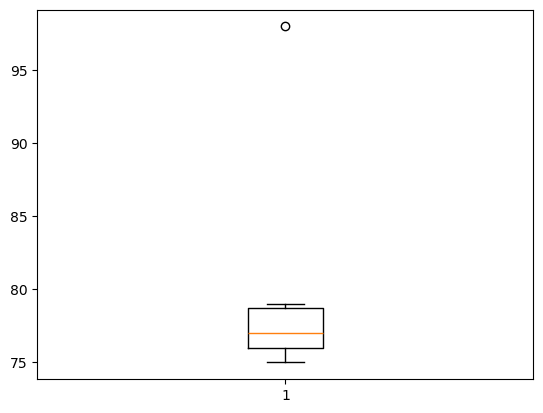

In [29]:
plt.boxplot(y1);

`-` B반 학생들의 박스플랏 그리기

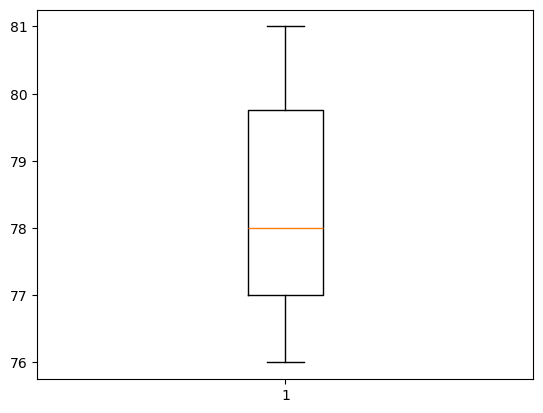

In [30]:
plt.boxplot(y2);

`-` A반 학생들의 점수와 B반 학생들의 점수를 나란히 박스플랏으로 그리자.

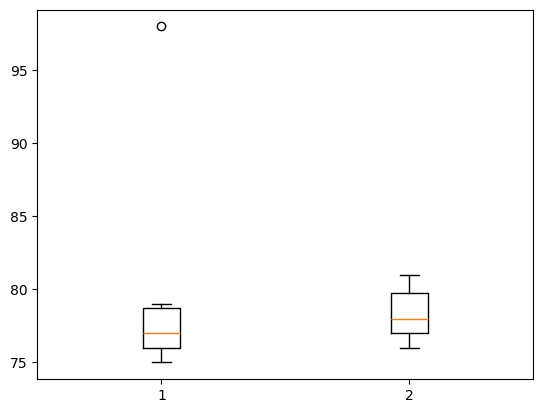

In [31]:
plt.boxplot([y1,y2]);

## boxplot이란?

`-` (**galarnyk_python_tutorials?**)

-   <https://github.com/mGalarnyk/Python_Tutorials/blob/master/Statistics/boxplot/box_plot.ipynb>

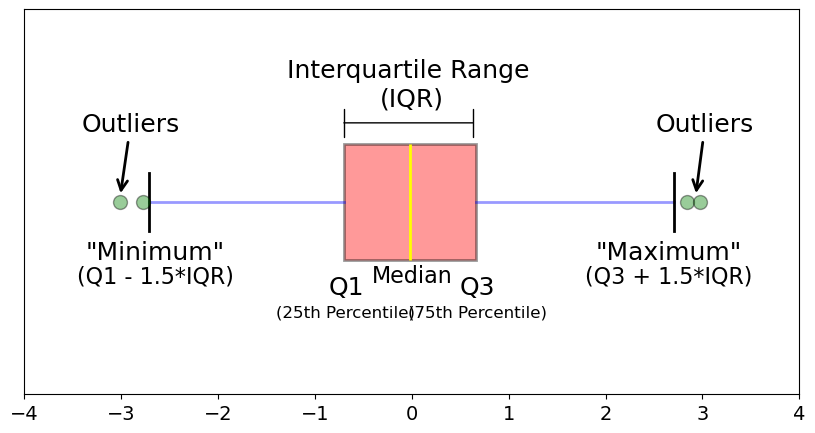

In [32]:
np.random.seed(916170)

# connection path is here: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5))

# rectangular box plot
bplot = axes.boxplot(s,
                vert=False,
                patch_artist=True, 
                showfliers=True, # This would show outliers (the remaining .7% of the data)
                positions = [0],
                boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4),
                medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                whiskerprops = dict(linestyle='-', linewidth=2, color='Blue', alpha = .4),
                capprops = dict(linestyle='-', linewidth=2, color='Black'),
                flierprops = dict(marker='o', markerfacecolor='green', markersize=10,
                  linestyle='none', alpha = .4),
                widths = .3,
                zorder = 1)   

axes.set_xlim(-4, 4)
plt.xticks(fontsize = 14)

axes.set_yticks([])
axes.annotate(r'',
            xy=(-.73, .205), xycoords='data',
            xytext=(.66, .205), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

axes.text(0, .25, "Interquartile Range \n(IQR)",  horizontalalignment='center', fontsize=18)
axes.text(0, -.21, r"Median", horizontalalignment='center', fontsize=16);
axes.text(2.65, -.15, "\"Maximum\"", horizontalalignment='center', fontsize=18);
axes.text(-2.65, -.15, "\"Minimum\"", horizontalalignment='center', fontsize=18);
axes.text(-.68, -.24, r"Q1", horizontalalignment='center', fontsize=18);
axes.text(-2.65, -.21, r"(Q1 - 1.5*IQR)", horizontalalignment='center', fontsize=16);
axes.text(.6745, -.24, r"Q3", horizontalalignment='center', fontsize=18);
axes.text(.6745, -.30, r"(75th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(-.68, -.30, r"(25th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(2.65, -.21, r"(Q3 + 1.5*IQR)", horizontalalignment='center', fontsize=16);

axes.annotate('Outliers', xy=(2.93,0.015), xytext=(2.52,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

axes.annotate('Outliers', xy=(-3.01,0.015), xytext=(-3.41,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

-   가장 큰 값이 100%, 가장 작은 값이 0%, 중간값이 50%

## boxplot을 언제 쓰면 좋을까?

`-` 박스플랏의 장점: 단순히 평균을 주는 것보다 데이터를 파악하고 직관을
얻기에 유리하다.

`-` 박스플랏이 이용되는 범위:

-   첫 데이터 분석때 자료 분포를 파악하기 용이
-   Kaggel등의 대회참여시, 두 개 이상의 모형의 성능을 비교

# Histogram

## motivating example

`-` 전북고예제에서 우리의 소망: “A반 B반 중에 어떤 반이 공부를 더
잘하냐?”, “A선생님과 B선생님 중 어떤 분의 강의가 효과적이었다고 평할 수
있는가?” 와 같은 단순한 질문에 대한 대답

-   보통 이러한 질문은 **중심경향값** 중 하나를 골라서 비교하면 되었다.
-   여기에서 **중심경향값**이란 데이터 분포의 중심을 보여주는 값으로
    자료 전체를 대표할 수 있는 값을 말함. 평균, 중앙값등이 대표적인
    중심경향값이다.

`-` 전북고예제에서는 “A반 B반 중에서 어떤 반이 공부를 더 잘하냐?” 라는
질문의 대답으로 단순평균비교로는 의미가 없었다. 오히려 결과론적으로 보면
중앙값이 더 타당해 보인다.

`-` 그런데 사실 생각해보면 중앙값을 기준으로 B반이 공부를 더 잘했다고
주장하는 것도 애매하다. 어쨌든 가장 공부잘한 학생은 A반에 있으니까!

-   에이 한명 뿐이잖아요? 라고 생각할 수 있는데 그 한명이 2명 3명으로
    점점 늘어난다고 생각해보자, 합리적인 기준을 제시할 수 있는가?
-   그리고 A반을 지도한 선생님이 영재를 지도하는데 특화된 선생님일수도
    있잖아요?

`-` 사실 “A반 B반중에 누가 더 공부를 잘하냐?” 라는 질문은 굉장히
대답하기 곤란한 질문이다. 왜냐하면

-   이슈1: 단순 평균비교로 이러한 질문에 답을 하기 어렵다.
-   이슈2: 박스플랏으로 전체분포를 파악해도 어떠한 반이 더 공부를
    잘한다는 기준을 잡는게 애매하다.

`-` **그런데 특수한 경우에는 “A반 B반중에 누가 더 공부를 잘하냐?” 라는
질문에 대한 대답을 깔끔하게 할 수 있다.**

**`# 예제2` – 정규분포 전북고등학교: 평균은 좋은 측정값인가?**

`-` A반과 B반의 통계학 성적이 아래와 같다고 하자.

In [33]:
np.random.seed(43052)
y1 = np.random.randn(10000)
y2 = np.random.randn(10000) + 0.5 

In [34]:
np.mean(y1),np.mean(y2)

In [35]:
np.mean(y2) - np.mean(y1)

y2의 값이 y1의 값보다 전체적으로 0.5097056259662253 정도 높다고 볼 수
있다?

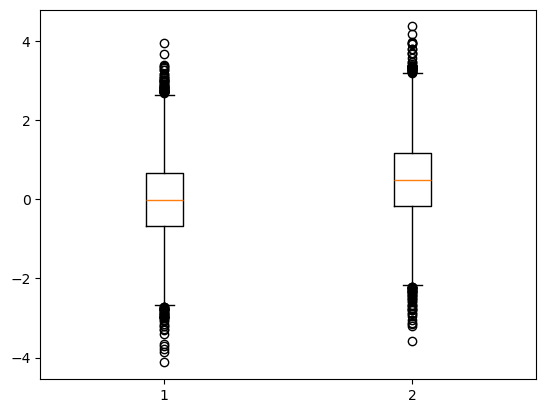

In [36]:
plt.boxplot([y1,y2]);

-   분포의 모양이 거의 비슷, 왼쪽그림을 컨트롤+C 하여 오른쪽에 붙인다음
    0.5정도 y축으로 올린느낌이다!

`-` 여기에서는 “B반의 성적 $\approx$ A반의 성적 + 0.5” 라고 주장해도 큰
무리가 없어보인다. 따라서 이 경우에는 “A반 B반 중에 어떤반이 더 공부를
잘하냐?” 라는 질문에 대하여 “B반이 평균적으로 0.5점정도 더 공부를
잘합니다” 라고 대답해도 괜찮다.

-   이 예제에서는 우연히 극단적인 학생이 없었음.
-   그렇지만 혹시 극단적인 학생이 나온다면? 걱징X. 너무 극단적인 값이
    많이 나오면 정규분포가 아님 + 만약에 어떠한 반에서 극단적인 학생이
    나온다면 똑같은 확률로 다른반 역시 그러한 극단적 학생이 나올 것

`-` 결론: 정규분포 분포가정을 한다면 이슈1,2에 대한 문제를 한번에
해결가능 함

`#`

`-` 정규분포가정은 어떻게 할 수 있나? (= 데이터를 보고 어떻게
정규분포라고 알 수 있는가?): 데이터의 히스토그램을 그려서 종 모양이
되는지 확인해본다.[1]

## histogram 이란?

`-` 히스토그램: X축이 변수의 구간, Y축은 그 구간에 포함된 빈도를
의미하는 그림

## histogram 그리기

`-` 히스토그램의 예시1 – 기본플랏, `;`으로 결과 생략하기

[1] 아직 초보단계라서 이것밖에 모를 수 있어요

In [37]:
y=[10,11,12,15,16,20,21,22,23,24,25]

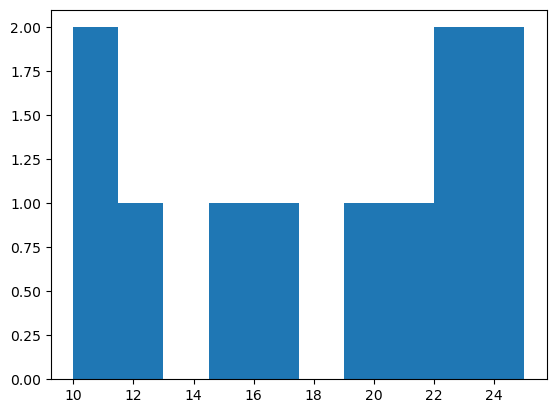

In [38]:
plt.hist(y)

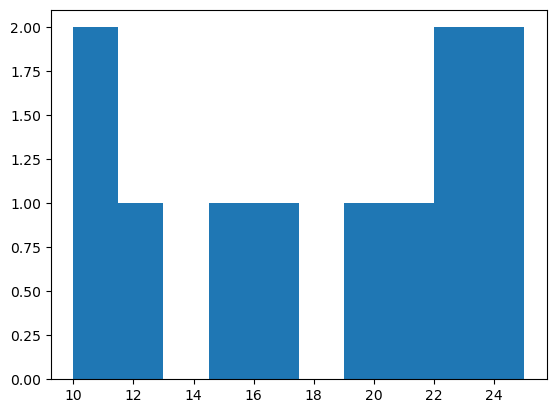

In [39]:
plt.hist(y,bins=10)

`-` 히스토그램 예시2 – bins 옵션이용

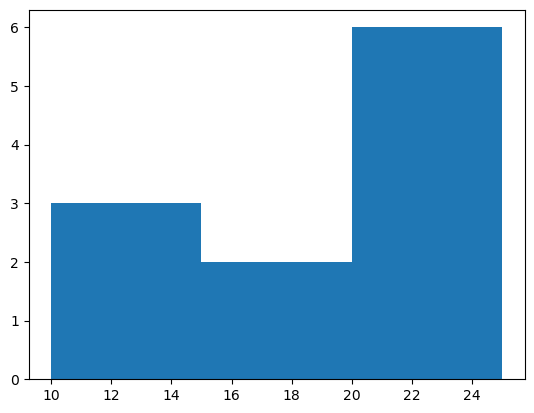

In [40]:
plt.hist(y,bins=3)

`-` 히스토그램 예시3 – bins=3 옵션의 결과값 해석

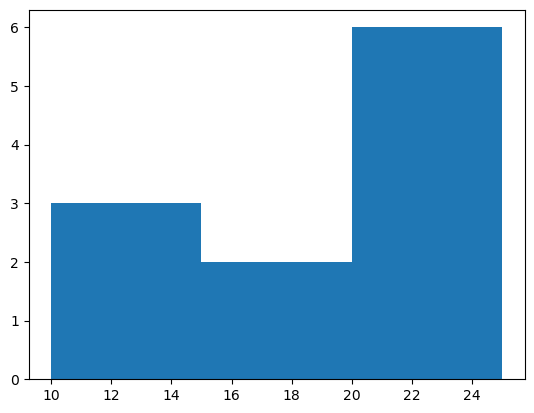

In [41]:
plt.hist(y,bins=3)

-   가장 큰 값은 25, 가장 작은 값은 10이므로 range는 15이다.
-   range / bins = 15 / 3 = 5 이므로 각 구간의 간격은 5이다.
-   구간은 \[10,15), \[15,20), \[20,25\] 로 나눈다.
-   각 구간에 포함된 자료의 수는 3,2,6 이다.

`-` 히스토그램 예시4 – bins=7 옵션의 결과값 해석

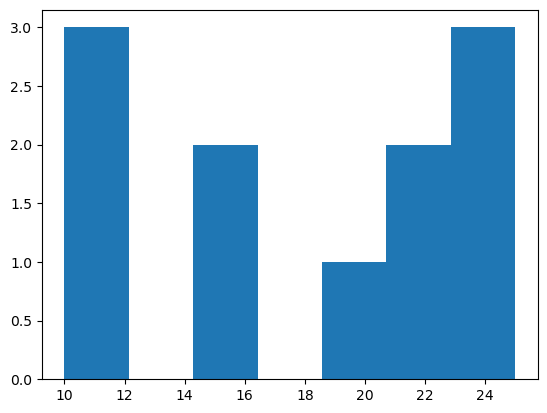

In [42]:
plt.hist(y,bins=7) 

-   가장 큰 값은 25, 가장 작은 값은 10이므로 range는 15이다.
-   range / bins = 15 / 7 = 2.142857142857143 이므로 각 구간의 간격은
    2.142857142857143이다.
-   구간은 \[10,12.14285714), \[12.14285714,14.28571429,),
    \[22.85714286,25\] 로 나눈다.
-   각 구간에 포함된 자료의 수는 3,0,2,0,1,2,3 이다.

`-` 히스토그램 예시5 – range 옵션

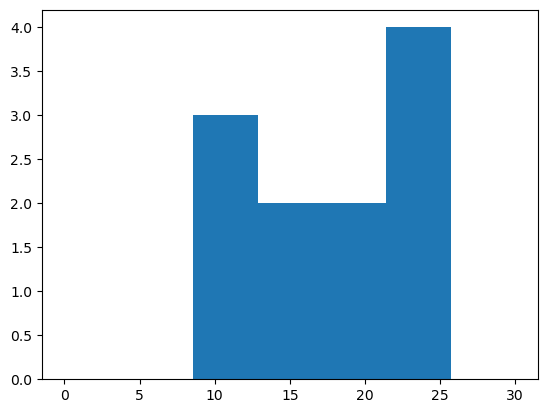

In [43]:
plt.hist(y,bins=7,range=[0,30]) # range를 변경하면 --> 구간도 달라짐

`-` 히스토그램 예시6 – 나란히 그리기

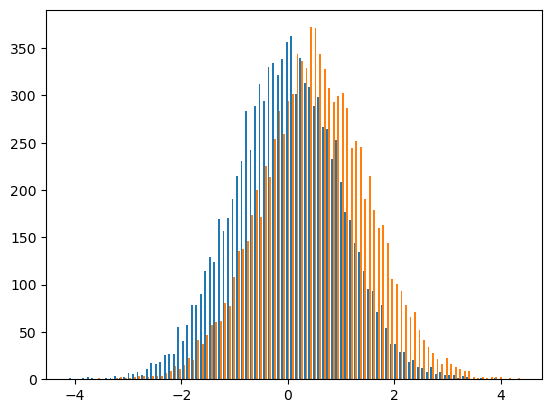

In [44]:
np.random.seed(43052)
y1 = np.random.randn(10000)
y2 = np.random.randn(10000) + 0.5 
plt.hist([y1,y2],bins=100);

# Histogram 응용예제 (HE)

## 예비학습1: 이미지자료 다운로드

`-` ref: <https://en.wikipedia.org/wiki/Histogram_equalization>

In [45]:
!wget https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
img = cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg')
!rm Unequalized_Hawkes_Bay_NZ.jpg

--2024-01-09 07:43:35--  https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110895 (108K) [image/jpeg]
Saving to: ‘Unequalized_Hawkes_Bay_NZ.jpg.1’

Unequalized_Hawkes_ 100%[===================>] 108.30K   586KB/s    in 0.2s    

2024-01-09 07:43:36 (586 KB/s) - ‘Unequalized_Hawkes_Bay_NZ.jpg.1’ saved [110895/110895]


-   `!wget 주소`: 주소에 있는 이미지를 다운로드
-   `!rm 파일이름`: 현재폴더에 “파일이름”을 삭제

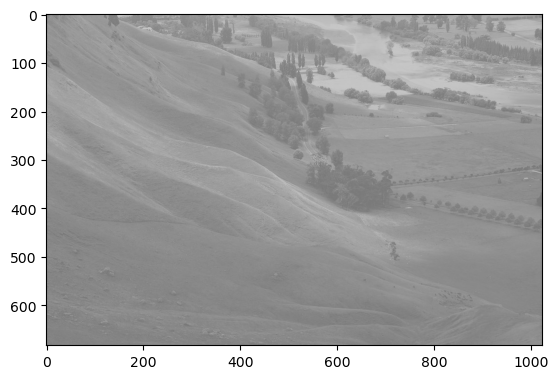

In [46]:
plt.imshow(img)

-   다운받은 이미지를 보는 방법

## 예비학습2: 이미지자료의 이해

### 비밀1: 이미지는 사실 숫자들의 집합이었음.

`-` 예시1 – 2d array = 흑백이미지

In [47]:
_img1 = np.array([0,30,90,120,150,180,210,240,255]).reshape(3,3)
_img1

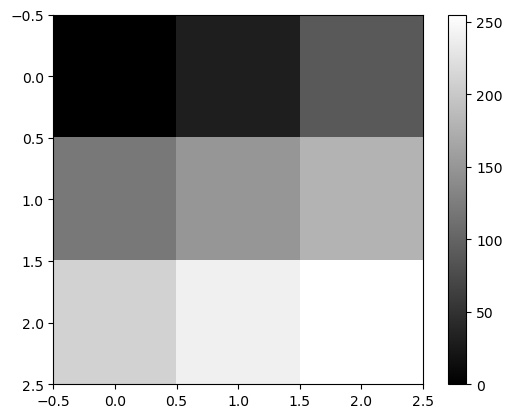

In [48]:
plt.imshow(_img1,cmap='gray')
plt.colorbar()

`-` 예시2 – 2d array = 흑백이미지

In [49]:
_img2 = np.array([0,20,40,60,80,100,120,140,160]).reshape(3,3)
_img2

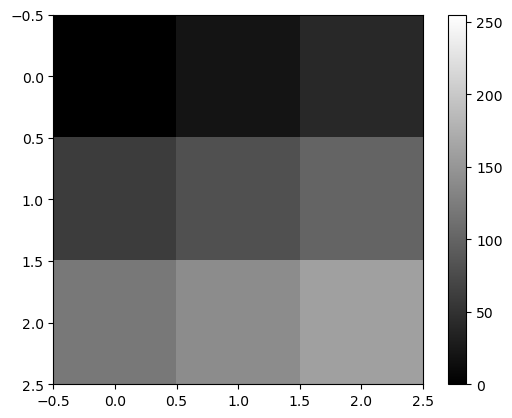

In [50]:
plt.imshow(_img2,cmap='gray',vmin=0,vmax=255)
plt.colorbar()

`-` 예시3 – 나란히 그리기

In [51]:
_img3 = np.concatenate([_img1,_img2],axis=1)
_img3

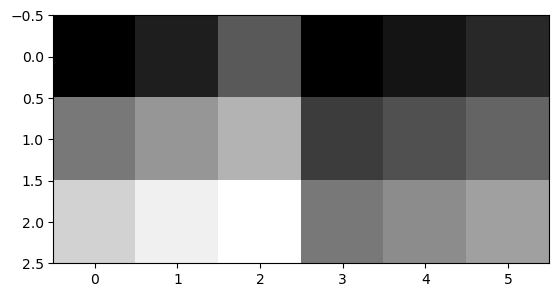

In [52]:
plt.imshow(_img3,cmap='gray')

### 비밀2: 칼라이미지는 red + green + blue 의 조합으로 표현가능 (다른방식도 가능)

`-` ref: <https://en.wikipedia.org/wiki/RGB_color_model>

<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/RGB_combination_on_wall.png/440px-RGB_combination_on_wall.png"
alt="그림 ??: 위키에서 긁은 그림, 빛의 3원색을 표현하고 있음" />
<figcaption aria-hidden="true">그림 ??: 위키에서 긁은 그림, 빛의 3원색을
표현하고 있음</figcaption>
</figure>

`-` 예시1 – 3d array = 칼라이미지

In [53]:
r = np.array(
    [[  0,   0,   0,   0,   0],
     [  0,   0,   0,   0,   0],
     [255, 255, 255, 255, 255],
     [255, 255, 255, 255, 255],
     [255, 255, 255, 255, 255]]
)
g = np.array(
    [[255, 255, 255,  0,   0],
     [255, 255, 255,  0,   0],
     [255, 255, 255,  0,   0],
     [  0,   0,   0,  0,   0],
     [  0,   0,   0,  0,   0]]
)
b = np.array(
    [[  0,   0, 255, 255, 255],
     [  0,   0, 255, 255, 255],
     [  0,   0, 255, 255, 255],
     [  0,   0,   0,   0,   0],
     [  0,   0,   0,   0,   0]]
)
z = np.array(
    [[ 0,  0,  0,  0,  0],
     [ 0,  0,  0,  0,  0],
     [ 0,  0,  0,  0,  0],
     [ 0,  0,  0,  0,  0],
     [ 0,  0,  0,  0,  0]]
)    

In [54]:
red = np.stack([r,z,z],axis=-1)
green = np.stack([z,g,z],axis=-1)
blue = np.stack([z,z,b],axis=-1)

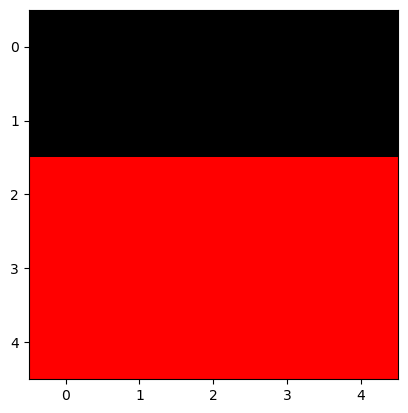

In [55]:
plt.imshow(red)

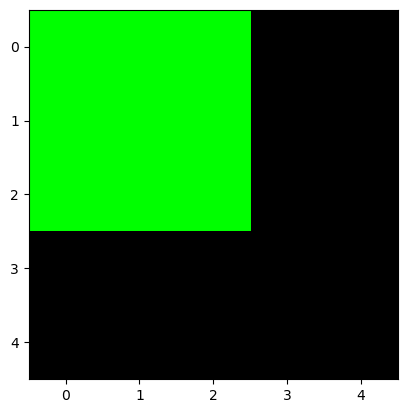

In [56]:
plt.imshow(green)

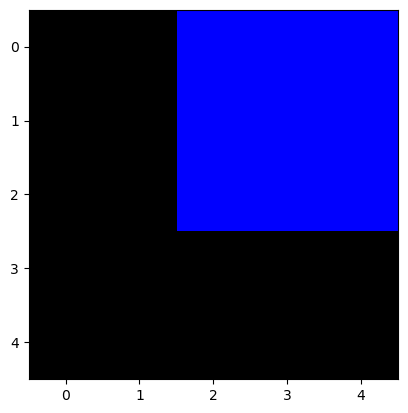

In [57]:
plt.imshow(blue)

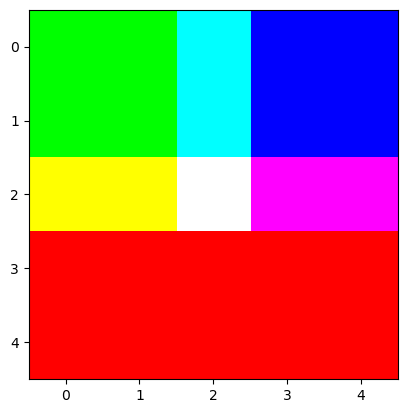

In [58]:
plt.imshow(red+green+blue)

`-` 예시2: R,G,B를 같은 비율로 섞으면 다시 흑백이미지가 된다.

In [59]:
arr2 = np.array(
    [[10,  40],
     [80,  60]]
)
arr2

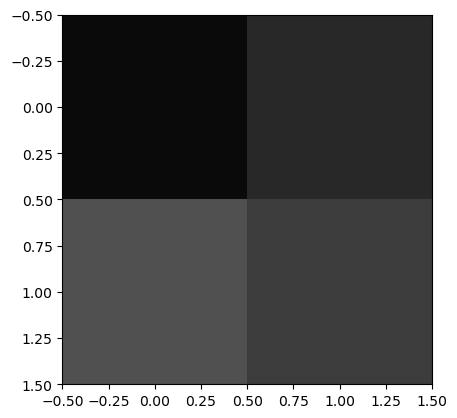

In [60]:
arr3 = np.stack([arr2,arr2,arr2],axis=-1)
plt.imshow(arr3)

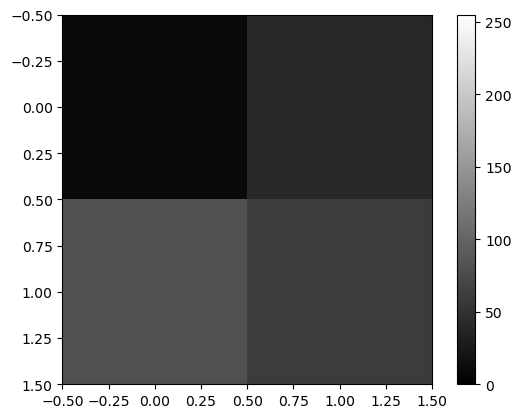

In [61]:
plt.imshow(arr2,cmap='gray',vmin=0,vmax=255)
plt.colorbar()

## 히스토그램 이퀄라이제이션

`-` 우리가 관심있었던 이미지

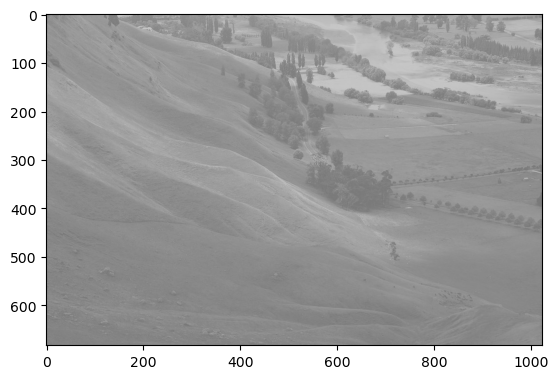

In [62]:
plt.imshow(img)

`-` 이미지를 rgb로 각각 분리하고 각 색깔들의 히스토그램을 그려보자.

In [63]:
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

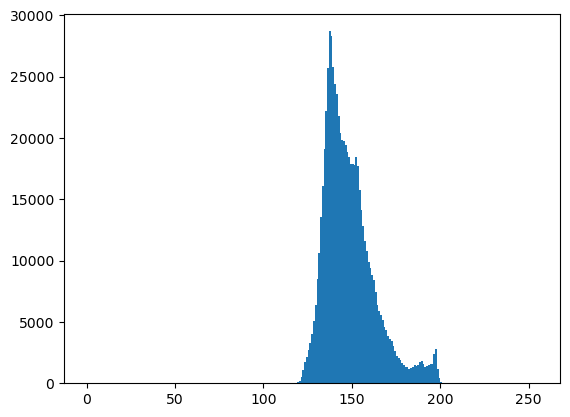

In [64]:
plt.hist(r.reshape(-1),range=(0,255),bins=255);

-   120-200 사이에 값이 몰려있음
-   만약에 120-200까지의 분포된 모양은 그대로 유지하면서 range를 0-255
    까지 늘린다면?

`-` `cv2.equalizeHist()`를 이용하여 분포의 모양은 대략적으로 유지하면서
값을 퍼트리자!

In [65]:
rr = cv2.equalizeHist(r)
gg = cv2.equalizeHist(g)
bb = cv2.equalizeHist(b)

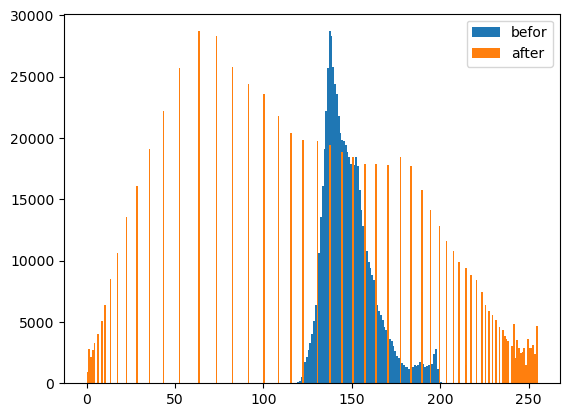

In [66]:
plt.hist(r.reshape(-1),bins=255, range=[0,255],label='befor');
plt.hist(rr.reshape(-1),bins=255,range=[0,255],label='after');
plt.legend()

`-` 변환이후의 이미지를 그려본다면?

In [67]:
img2 = np.stack([rr,gg,bb],axis=-1)

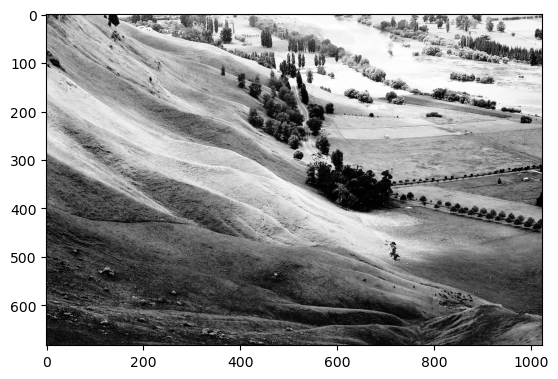

In [68]:
plt.imshow(img2)

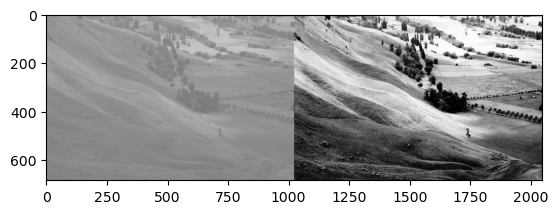

In [69]:
plt.imshow(np.concatenate([img,img2],axis=1))

# Line plot

## 기본플랏

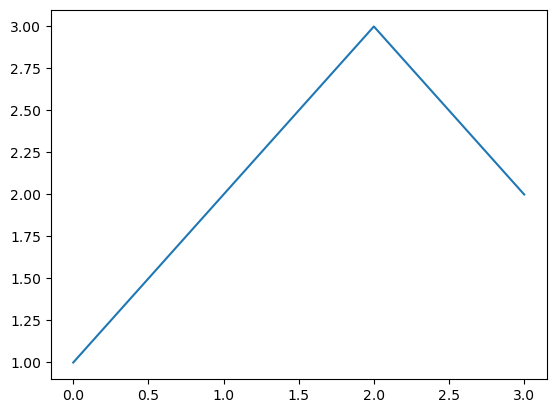

In [70]:
plt.plot([1,2,3,2])

## 모양변경

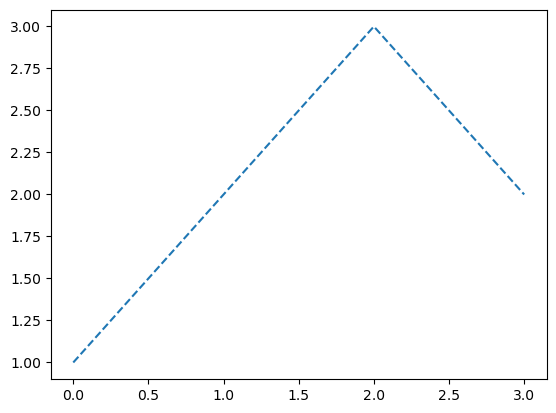

In [71]:
plt.plot([1,2,3,2],'--')

## 색상변경

`-` 예시1

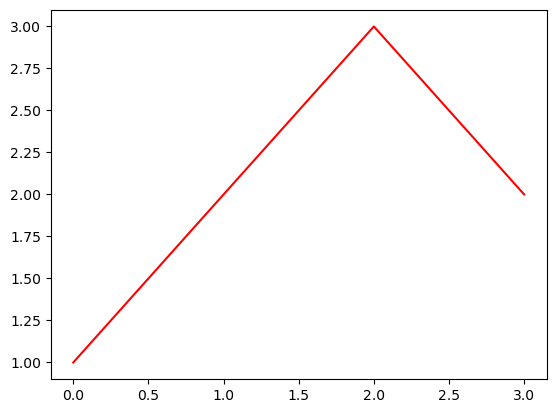

In [72]:
plt.plot([1,2,3,2],'r')

`-` 예시2

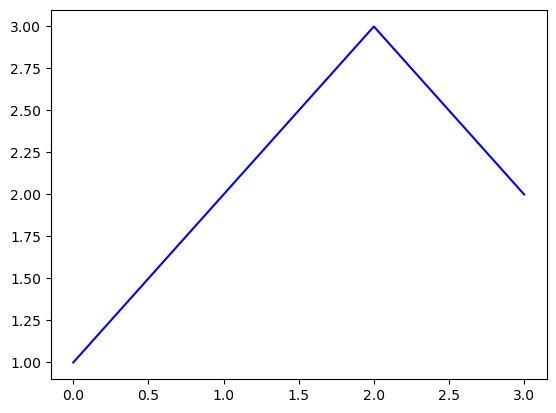

In [73]:
plt.plot([1,2,3,2],'b')

## 모양 + 색상변경

`-` 예시1

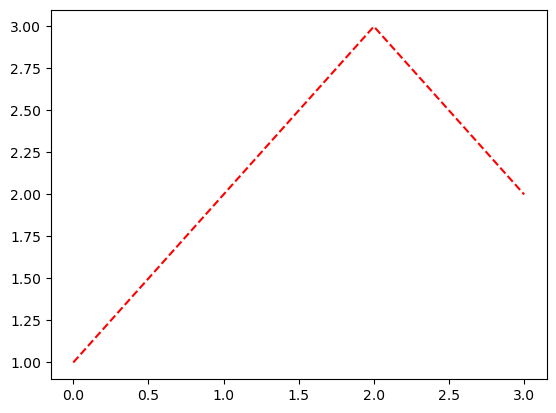

In [74]:
plt.plot([1,2,3,2],'--r')

`-` 예시2: 순서변경 가능

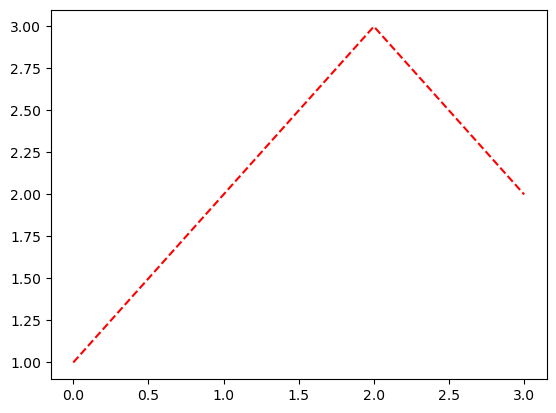

In [75]:
plt.plot([1,2,3,2],'r--')

## 원리?

`-` `r--`등의 옵션은 Markers + Line Styles + Colors 의 조합으로 표현가능

ref:
<https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html>

-   `--r`: 점선(dashed)스타일 + 빨간색
-   `r--`: 빨간색 + 점선(dashed)스타일
-   `:k`: 점선(dotted)스타일 + 검은색
-   `k:`: 검은색 + 점선(dotted)스타일

`-` 우선 Marker를 무시하면 Line Styles + Color로 표현가능한 조합은
$4\times 8=32$ 개

### Line Styles

| character |     description     |
|:---------:|:-------------------:|
|    ‘-’    |  solid line style   |
|    ‘–’    |  dashed line style  |
|   ‘-.’    | dash-dot line style |
|    ‘:’    |  dotted line style  |

### Colors

| character |  color  |
|:---------:|:-------:|
|    ‘b’    |  blue   |
|    ‘g’    |  green  |
|    ‘r’    |   red   |
|    ‘c’    |  cyan   |
|    ‘m’    | magenta |
|    ‘y’    | yellow  |
|    ‘k’    |  black  |
|    ‘w’    |  white  |

### Markers

| character |      description      |
|:---------:|:---------------------:|
|    ‘.’    |     point marker      |
|    ‘,’    |     pixel marker      |
|    ‘o’    |     circle marker     |
|    ‘v’    | triangle_down marker  |
|    ‘^’    |  triangle_up marker   |
|   ‘\<’    | triangle_left marker  |
|   ‘\>’    | triangle_right marker |
|    ‘1’    |    tri_down marker    |
|    ‘2’    |     tri_up marker     |
|    ‘3’    |    tri_left marker    |
|    ‘4’    |   tri_right marker    |
|    ‘8’    |    octagon marker     |
|    ‘s’    |     square marker     |
|    ‘p’    |    pentagon marker    |
|    ‘P’    | plus (filled) marker  |
|   ’\*’    |      star marker      |
|    ‘h’    |    hexagon1 marker    |
|    ‘H’    |    hexagon2 marker    |
|    ‘+’    |      plus marker      |
|    ‘x’    |       x marker        |
|    ‘X’    |   x (filled) marker   |
|    ‘D’    |    diamond marker     |
|    ‘d’    |  thin_diamond marker  |
|   ‘\|’    |     vline marker      |
|   ’\_’    |     hline marker      |

`-` 예시1

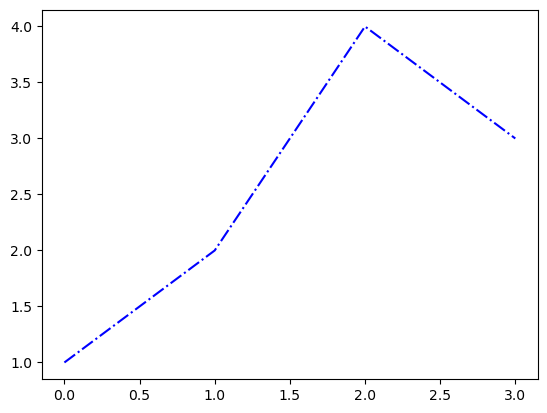

In [76]:
plt.plot([1,2,4,3],'b-.')

`-` 예시2

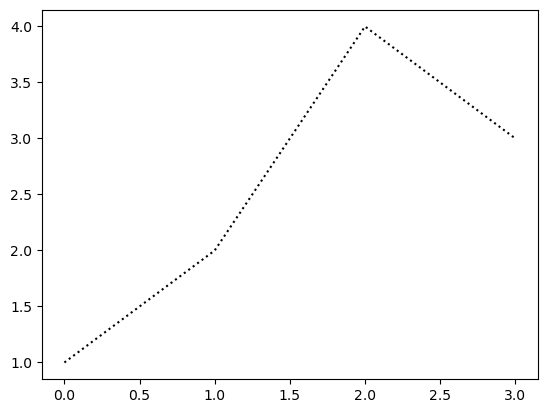

In [77]:
plt.plot([1,2,4,3],'k:')

`-` 예시3: line style + color 조합으로 사용하든 color + line style
조합으로 사용하든 상관없음

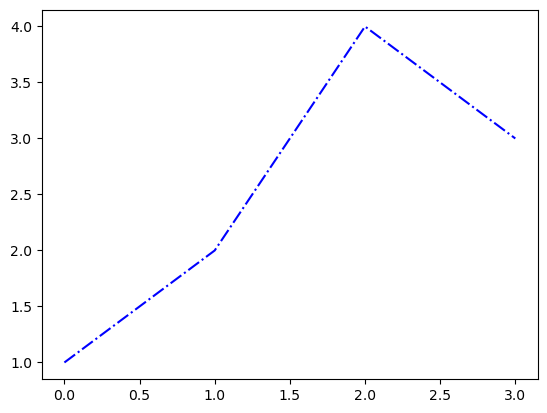

In [78]:
plt.plot([1,2,4,3],'-.b')

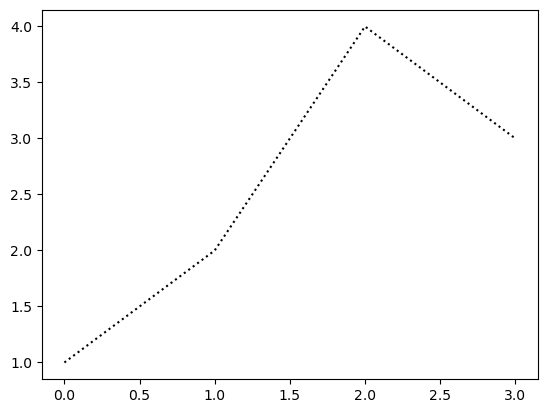

In [79]:
plt.plot([1,2,4,3],':k')

`-` 예시4: line style을 중복으로 사용하거나 color를 중복으로 쓸 수 는
없다.

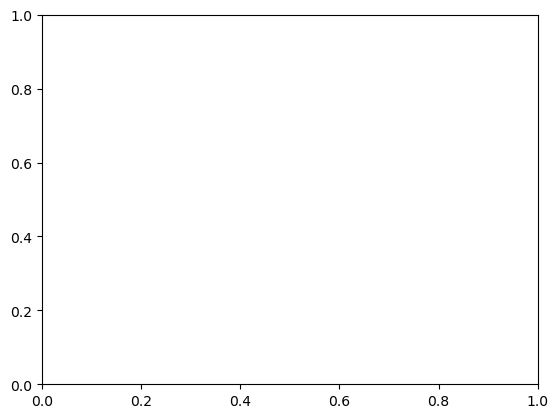

In [80]:
plt.plot([1,2,4,3],'br')

`-` 예시5: 색이 사실 8개만 있는건 아니다.

ref: <https://matplotlib.org/2.0.2/examples/color/named_colors.html>

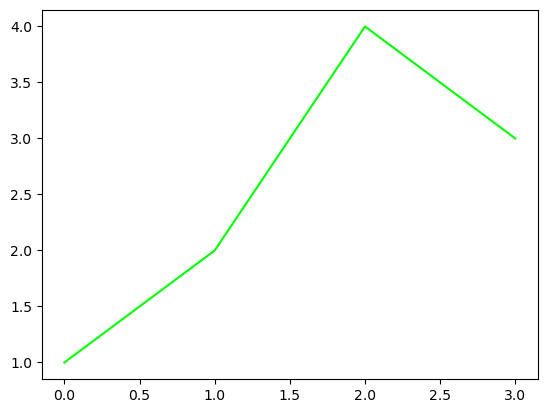

In [82]:
plt.plot([1,2,4,3],color='lime')

`-` 예시6: 색을 바꾸려면 hex코드를 넣는 방법이 젤 깔끔함

ref: <https://htmlcolorcodes.com/>

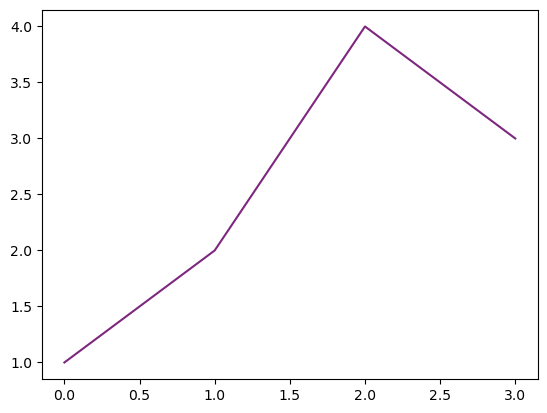

In [83]:
plt.plot([1,2,4,3],color='#7E277E')

`-` 예시7: 당연히 라인스타일도 4개만 있진 않음

ref:
<https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html>

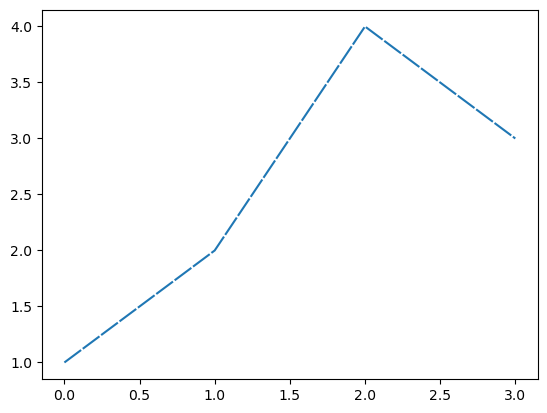

In [84]:
plt.plot([1,2,4,3],linestyle=(0, (10, 1)))

# Scatter plot

## 원리

`-` 그냥 마커를 설정하면 끝!

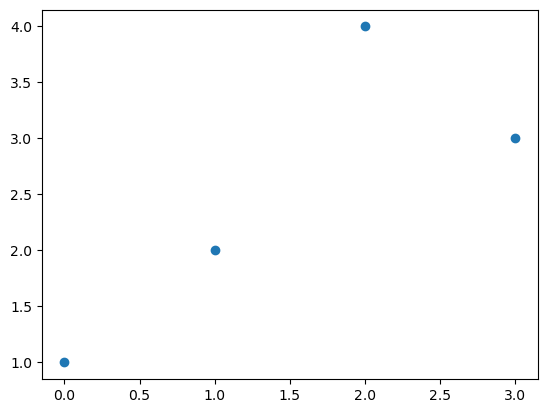

In [102]:
plt.plot([1,2,4,3],'o')

## 기본플랏

`-` 예시1

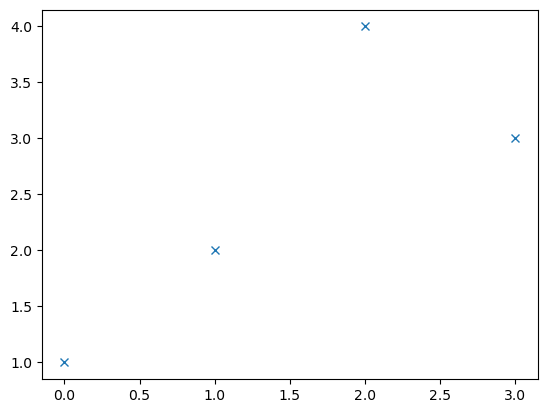

In [94]:
plt.plot([1,2,4,3],'x')

`-` 예시2

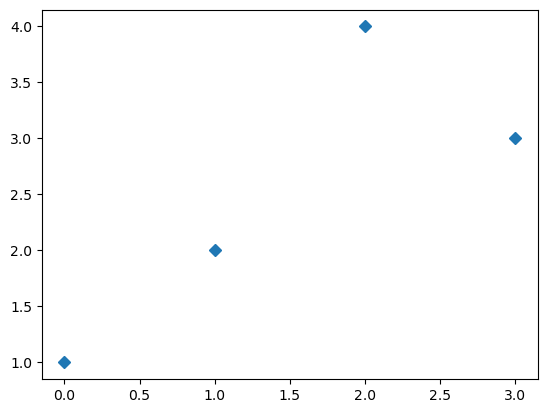

In [95]:
plt.plot([1,2,4,3],'D')

## 색깔변경

`-` 예시1

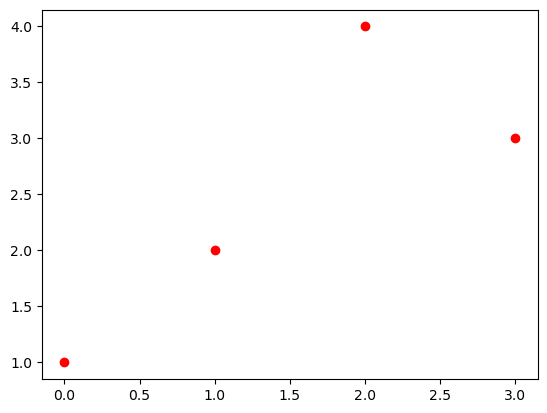

In [101]:
plt.plot([1,2,4,3],'or')

`-` 예시2

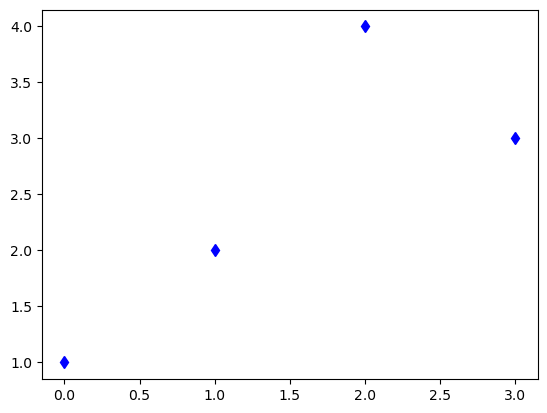

In [100]:
plt.plot([1,2,4,3],'db')

`-` 예시3

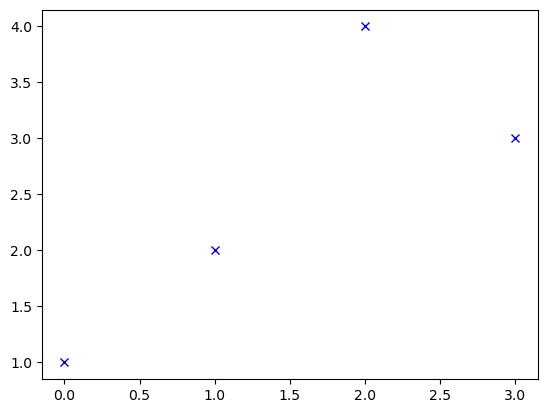

In [99]:
plt.plot([1,2,4,3],'bx')

## dot-connected plot

`-` 예시1: 마커와 라인스타일을 동시에 사용하면 dot-connected plot이
된다.

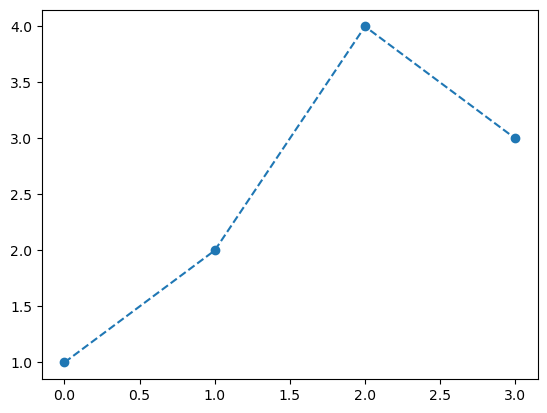

In [103]:
plt.plot([1,2,4,3],'--o')

`-` 예시2: 당연히 색도 적용가능함

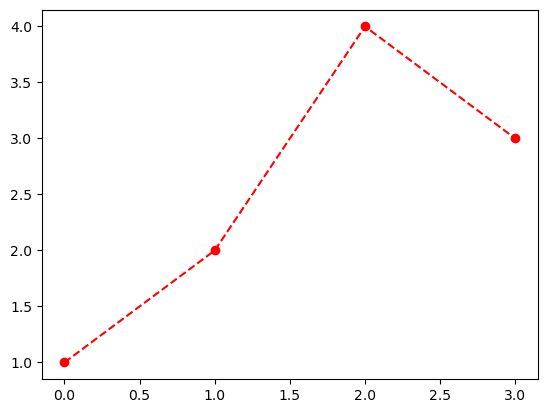

In [104]:
plt.plot([1,2,4,3],'--or')

`-` 예시3: 서로 순서를 바꿔도 상관없다.

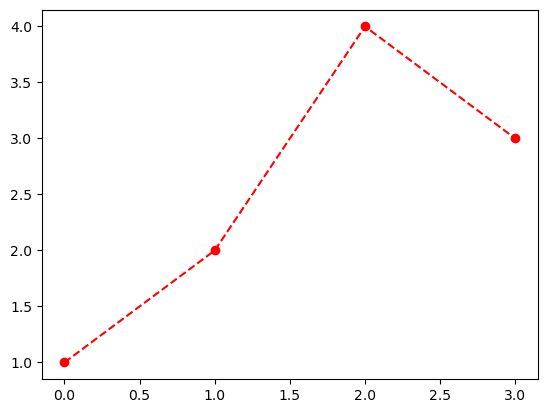

In [105]:
plt.plot([1,2,4,3],'r--o')

`-` 예시4: 색만 따로 바꾸고싶다면?

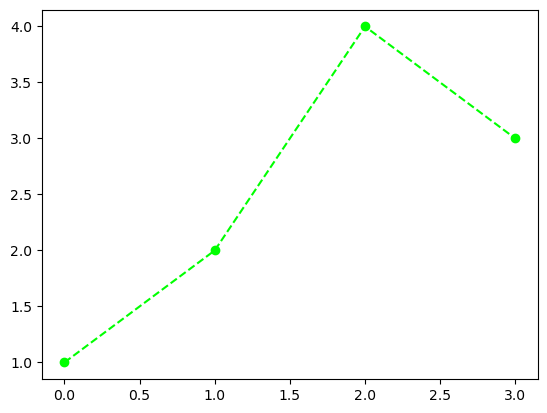

In [106]:
plt.plot([1,2,4,3],'--o',color='lime')

# 겹쳐 그리기

`-` 예시1

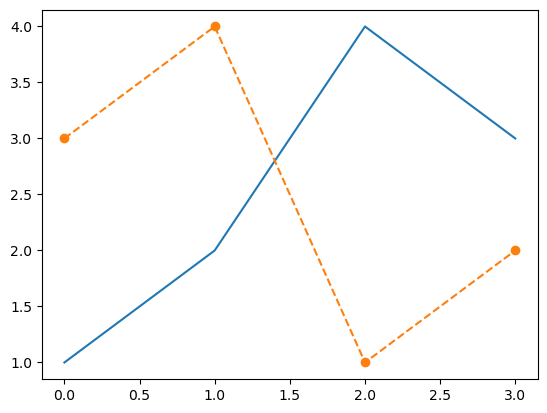

In [107]:
plt.plot([1,2,4,3])
plt.plot([3,4,1,2],'--o')

`-` 예시2

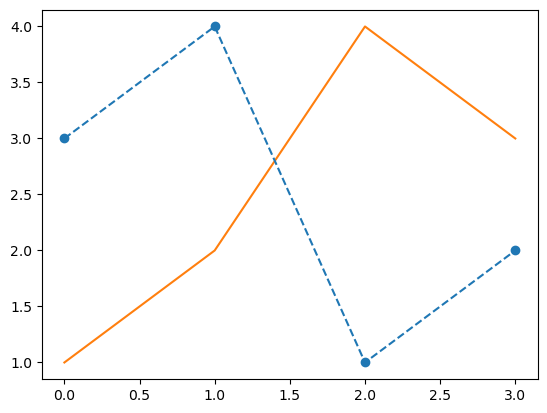

In [108]:
plt.plot([1,2,4,3],color='C1')
plt.plot([3,4,1,2],'--o',color='C0')

`-` 예시3

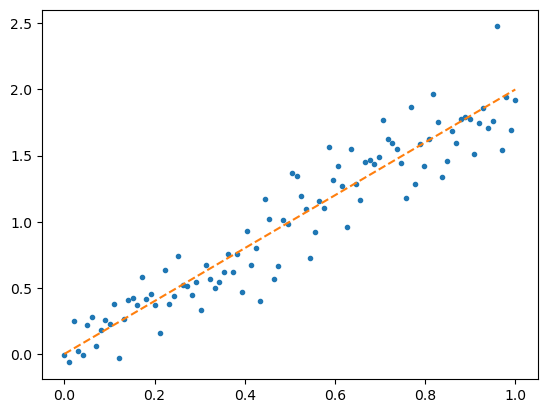

In [109]:
x=np.linspace(0,1,100)
eps = np.random.randn(100)*0.2
y= 2*x + eps 
plt.plot(x,y,'.')
plt.plot(x,2*x,'--')

# Scatter plot 응용예제1 – 표본상관계수

## motivating EX

`# 예제` – 키와 몸무게의 산점도

`-` 아래와 같은 자료를 수집하였다고 하자.

-   몸무게 = \[44,48,49,58,62,68,69,70,76,79\]
-   키 = \[159,160,162,165,167,162,165,175,165,172\]

In [110]:
x=[44,48,49,58,62,68,69,70,76,79]
y=[159,160,162,165,167,162,165,175,165,172]

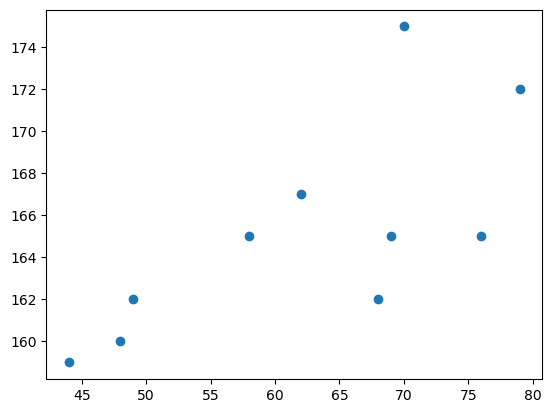

In [111]:
plt.plot(x,y,'o')

-   키가 큰 사람일수록 몸무게도 많이 나간다. (반대도 성립)
-   키와 몸무게는 관계가 있어보인다. (정비례)

`-` 얼만큼 정비례인지?

-   이 질문에 대답하기 위해서는 상관계수의 개념을 알아야 한다.
-   상관계수는 산점도의 해석에서 가장 중요한 개념 중 하나.

`#`

## 예비학습 – 상관계수

`# 예제` – 키와 몸무게에서 상관계수

`-` 다시 아래의 자료를 고려하자.

In [112]:
x=[44,48,49,58,62,68,69,70,76,79]
y=[159,160,162,165,167,162,165,175,165,172]

`-` (표본)상관계수

$$r=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2\sum_{i=1}^{n}(y_i-\bar{y})^2 }}=\sum_{i=1}^{n}\tilde{x}_i\tilde{y}_i $$

-   단,
    $\tilde{x}_i=\frac{(x_i-\bar{x})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}}$,
    $\tilde{y}_i=\frac{(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}$

`-` 상관계수를 계산하는 방법

(원래자료)

In [113]:
x,y

(평균을 0으로)

In [114]:
xx = x-np.mean(x)
yy = y-np.mean(y) 

(퍼진정도를 표준화)

In [115]:
xxx = xx/np.sqrt(np.sum(xx**2))
yyy = yy/np.sqrt(np.sum(yy**2))

In [116]:
(xxx*yyy).sum()

`-` 상관계수를 계산하는 방법2

In [117]:
np.corrcoef(x,y)

`-` 상관계수의 성질: 절대값이 1보다 작다.

`#`

## 산점도를 보고 상관계수의 부호를 해석

`# 예제` – 키와 몸무게의 산점도 + 상관계수의 부호해석

`-` 질문: 아래의 그림은 상관계수 $r$의 값이 양수인가 음수인가?

In [118]:
x=[44,48,49,58,62,68,69,70,76,79]
y=[159,160,162,165,167,162,165,175,165,172]

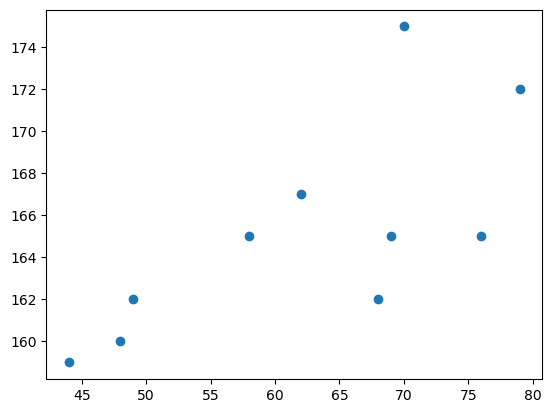

In [119]:
plt.plot(x,y,'o')

`-` 차근차근 따져보자.

In [120]:
xx = x-np.mean(x)
yy = y-np.mean(y) 
xxx = xx/np.sqrt(np.sum(xx**2))
yyy = yy/np.sqrt(np.sum(yy**2))

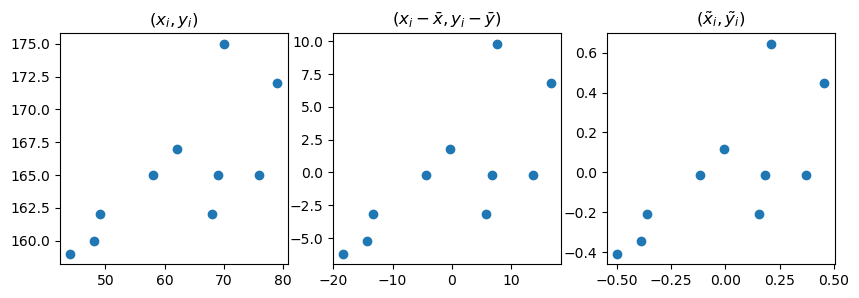

In [121]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,3))
ax1.plot(x,y,'o'); ax1.set_title(r'$(x_i,y_i)$')
ax2.plot(xx,yy,'o'); ax2.set_title(r'$(x_i-\bar{x},y_i-\bar{y})$')
ax3.plot(xxx,yyy,'o'); ax3.set_title(r'$(\tilde{x}_i,\tilde{y}_i)$')

-   $\tilde{x}_i$, $\tilde{y}_i$ 를 곱한값이 양수인것과 음수인것을
    체크해보자.
-   양수인쪽이 많은지 음수인쪽이 많은지 생각해보자.
-   $r=\sum_{i=1}^{n}\tilde{x}_i \tilde{y}_i$ 의 부호는?

`-` 그림을 보고 상관계수의 부호를 알아내는 방법? $(x_i,y_i)$의 산점도를
보고 $(\tilde{x}_i, \tilde{y}_i)$ 의 산점도를 상상 $\to$ 1,3 분면에
점들이 많으면 양수, 2,4 분면에 점들이 많으면 음수

`#`

# Scatter plot 응용예제2 – 앤스콤의 4분할

`-` Anscombe’s quartet: 교과서에 나오는 그림임.

In [4]:
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = x1 
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]

x3 = x1 
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]

x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

`-` corr coef 체크

In [5]:
np.corrcoef([x1,y1]),np.corrcoef([x2,y2]),np.corrcoef([x3,y3]),np.corrcoef([x4,y4])

-   모두 0.816..

`-` 교훈1: 데이터를 분석하기 전에 항상 시각화를 하라.

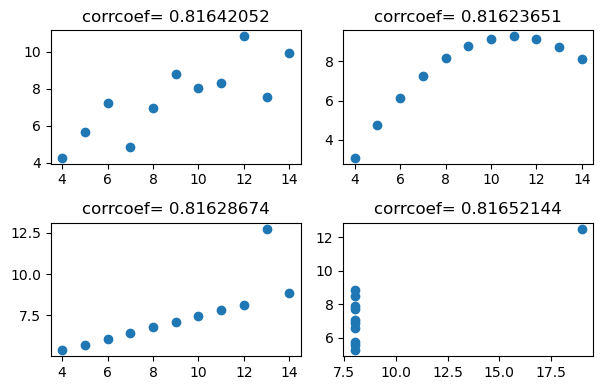

In [6]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(6,4))
ax1.plot(x1,y1,'o'); ax1.set_title('corrcoef= 0.81642052')
ax2.plot(x2,y2,'o'); ax2.set_title('corrcoef= 0.81623651')
ax3.plot(x3,y3,'o'); ax3.set_title('corrcoef= 0.81628674')  
ax4.plot(x4,y4,'o'); ax4.set_title('corrcoef= 0.81652144') 
fig.tight_layout()

`-` 앤스콤플랏의 4개의 그림은 모두 같은 상관계수를 가진다. $\to$ 하지만
4개의 그림은 느낌이 전혀 다르다.

`-` 같은 표본상관계수를 가진다고 하여 같은 관계성을 가지는 것은 아니다.
표본상관계수는 x,y의 비례정도를 측정하는데 그 값이 1에 가깝다고 하여 꼭
정비례의 관계가 있음을 의미하는게 아니다. $(x_i,y_i)$의 산점도가
선형성을 보일때만 “표본상관계수가 1에 가까우므로 정비례의 관계에 있다”
라는 논리전개가 성립한다.

-   앤스콤의 1번째 플랏: 산점도가 선형 $\to$ 표본상관계수가 0.816 =
    정비례의 관계가 0.816 정도
-   앤스콤의 2번째 플랏: 산점도가 선형이 아님 $\to$ 표본상관계수가 크게
    의미없음
-   앤스콤의 3번째 플랏: 산점도가 선형인듯 보이나 하나의 이상치가 있음
    $\to$ 하나의 이상치가 표본상관계수의 값을 무너뜨릴 수 있으므로
    표본상관계수값을 신뢰할 수 없음.
-   앤스콤의 4번째 플랏: 산점도를 그려보니 이상한 그림 $\to$
    표존상관계수를 계산할수는 있음. 그런데 그게 무슨 의미가 있을지?

`# 예제` – 하나의 이상치가 상관계수를 무너뜨리는 경우

`-` 아래와 같이 앤스콤의 첫번째 플랏을 다시 그려보자.

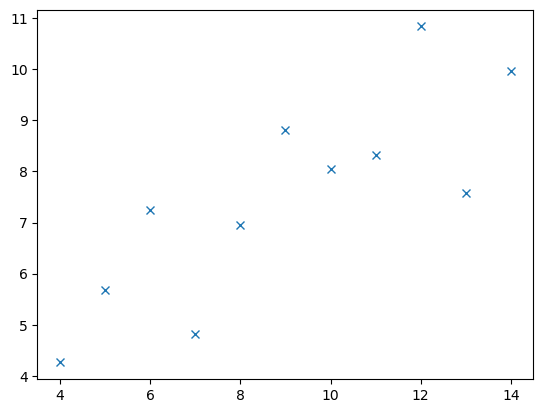

In [7]:
plt.plot(x1,y1,'x')

`-` 하나의 점을 추가하여 이 상관계수 값을 -1에 가깝게 만들 수 있다.

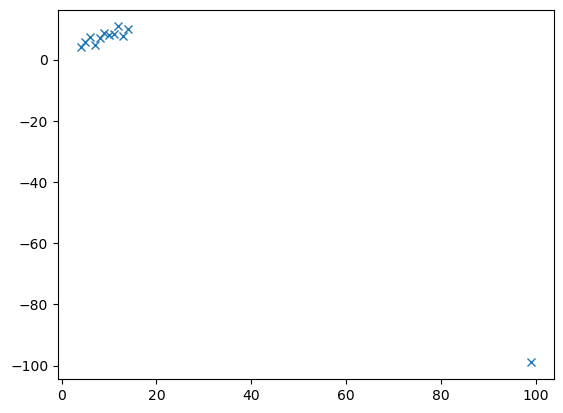

In [8]:
plt.plot(x1+[99],y1+[-99],'x')

In [9]:
np.corrcoef(x1+[99],y1+[-99])

`#`

`-` 교훈2: 상관계수를 해석하기에 앞서서 산점도가 선형성을 보이는지
체크할 것! 항상 통계학과에서 배우는 통계량 (혹은 논리전개)는 적절한
가정하에서만 말이된다는 사실을 기억할 것!

------------------------------------------------------------------------

# 요약

`-` summary: boxplot, histogram, lineplot, scatterplot

-   라인플랏: 추세
-   스캐터플랏: 두 변수의 관계
-   박스플랏: 분포(일상용어)의 비교, 이상치
-   히스토그램: 분포(통계용어)파악
-   바플랏: 크기비교